# 長期投資の基本

本記事では最も基本的なデータ分析の方法を学びます。

- 長期投資が基本
- 長期に手に入るデータで値動きの特徴を分析




- 市場規模の把握
- 見せかけのトレンドとランダムウォーク
- 破綻をさけるために

# 手に入る長期間のデータで値動きの特徴を分析

直近のそれなりのデータを使った方が、適切な分析ができるのではと思っていませんか？株式市場は生き物のようなもので、性質がちょくちょく変わるので短いデータで分析するべきだという話を時たま耳にします。しかし、それは間違いです。短いデータで分析をすると、自分が期待している結果がすぐに出るのだと誤解をしてしまいます。過去を分析するということは、自分の期待を裏切らない結果を選択するということになってしまいがちです。分析に使うデータは長いに越したことはありません。長すぎるということはありません。その方が、自分が期待する結果は出にくくなるのです。事実と対面することができるのです。時にはモンテカルロ法で疑似的にデータを作る必要もあるほどですから。

# 市場規模の把握

長期投資の基本は相手をよく知ること。それは他と比べることから始まります。投資をする際にはまずは正確にその市場規模を理解しておくことが重要です。



||||
|:---:|:---:|:---:|
|日本の株式市場の時価総額|USD 6.7 T|　2020 wiki|
|米国の株式市場の時価総額|USD 44 T|　2020 wiki|
|NY証券取引所の時価総額|USD 22 T|2023/1 wiki|
|米国ナスダックの時価総額|USD 18 T|2023/1 wiki|
|SP500 株価指数の時価総額|USD 33 T|2022/12 wiki|
|世界の株式市場の時価総額| USD 94 T|2020 wiki|
|米国債市場| USD 23 T|2022/6 wiki|
|日本の国債市場| USD 9.8 T|2022/12 wiki|

||||
|:---:|:---:|:---:|
|SPY時価総額|USD 0.38T|yahoo finance 2023/5/26|
|アジアの株式ETF|USD 0.9T|wiki
|米国の株式ETF|USD 5.4 T|wiki|
|米国の債券ETF|USD 1.4 T|wiki|
|米国のMutual Fund運用資産残高|USD 23.9T| 2020/12 wiki|
|日本のMutual Fund運用資産残高|USD 2.1T|2020/12 wiki
|ヘッジファンドの運用資産残高|USD 3.8 T|2021 wiki



大体の規模感がつかめたのではないでしょうか？少なくとも米国の金融市場は日本よりもバカでかい。かつ日本の国債市場は株式市場よりも大きい。しかし、米国の場合にはそうではありません。国民一人当たりのGDPが両国で同じであるとすると、どちらの株式市場が上昇しやすいでしょうか？日本の場合には多くの新しく生産されたサービスや付加価値の対価が金利の支払いに回されています。

# 見せかけのトレンドとランダムウォーク

多くの経済時系列や株価はランダムウォークにしたがいます。ランダムウォークにしたがう時系列は時間の経過にともない平均や分散が変化してしまいます。ランダムウォークでは時間の経過とともに平均は確率的に変化し、分散は時間の経過の平方根に比例して増大します。したがって、その株価の将来は予測が不可能です。予測ができないということは売買するタイミングを図っても意味がありません。ランダムウォークが酔っ払いの千鳥足にたとえられるように将来どこに行くの分からないのです。かつ時間の経過とともにその幅は大きくなります。つまり、大きく上昇するかもしれませんが、下落もします。

株価データがランダムウォークにしたがうかどうかを知ることはつぎの2つの点から重要です。
1) 発生したトレンドが見せかけのトレンドか、トレンドはたまたま生じたものなのか、
2) ２つの時系列が相関を示したときにそれらは見せかけの相関か、たまたま発生したものではないのか、
という点です。ランダムウォークでは簡単にトレンドが発生します。それを見せかけのトレンドといいます。そして、そういうトレンドに対して相関を取ると、見せかけのトレンドが現れます。つまり、見せかけでないことを明確にする情報があったり、そうなる理由が明確でランダムな現象の奥に真のトレンドがあるのだという確信があるとき以外は投資できません。

Pythonでランダムウォークをつくってみましょう。つぎの図は乱数が作った株価の動きです。様々な動きをしますが、上昇トレンドや下落トレンドを作ることがあります。大体20回に一度そのような相場が現れます。これは株価がランダムに動いたとしてもトレンドが発生することを示しています。


In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.animation import FuncAnimation
import yfinance as yf
import pandas_datareader.data as web #データのダウンロードライブラリ

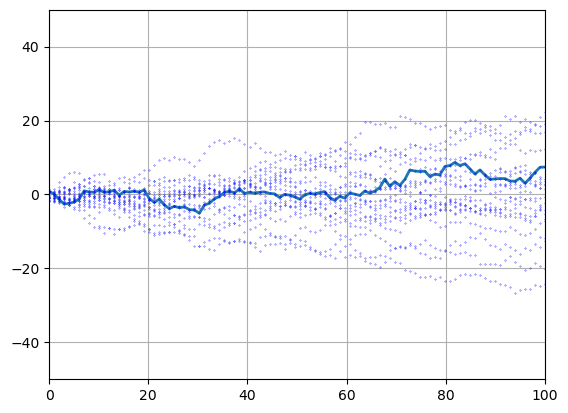

In [2]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(-50, 50)
ax.grid(True)
line, = ax.plot([], [],linestyle='-', linewidth=2)     
locus, = ax.plot([], [], 'b.', linewidth=1,markersize=0.5)     
def animate(i):
    x = np.linspace(0, 100,100)
    y = np.cumsum(np.random.randn(100,))
    line.set_data(x, y)
    xlocus.append(x)
    ylocus.append(y)
    locus.set_data(xlocus, ylocus)
    return line,
xlocus, ylocus = [], []
anim = FuncAnimation(fig, animate, frames=np.arange(20),
                     interval=1000, blit=False,repeat=False)
anim.save('randomwalk.gif', writer="pillow")
plt.show()

つぎに実際の株価を見てみましょう。株価がランダムウォークであるかどうかを判定する方法としてディッキーフラー検定があります。この検定には

- ドリフト無しランダムウォーク(rw)
- ドリフト付きランダムウォーク(drw)
- 時間トレンド・ドリフト付きランダムショーク(tdrw)
- 加速度付き時間トレンド・ドリフト付きランダムウォーク(qtdrw)

があります。これらの結果が0.1以下であれば、ランダムウォークでない可能性が高まります。

実際に、最小分散ポートフォリオ(usmv),ナスダック１００(qqq),S&P500(spy),ダウ平均(dia)についてみてみましょう。

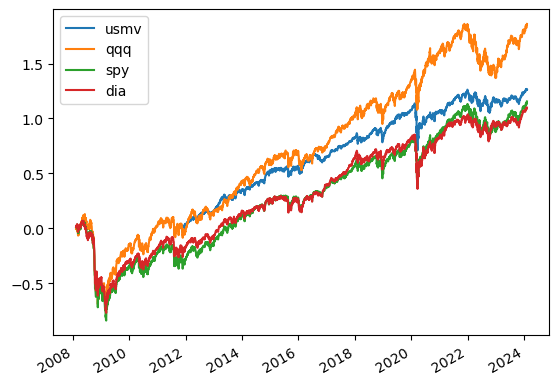

             n         c        ct       ctt
usmv  0.993399  0.514408  0.170859  0.004005
qqq   0.966156  0.961189  0.006555  0.028454
spy   0.880572  0.960458  0.000646  0.007170
dia   0.886216  0.955264  0.000968  0.005013


In [30]:
from statsmodels.tsa.stattools import adfuller

BASIC=['usmv','qqq','spy','dia']

ror = web.DataReader("DGS1","fred","1980/1/4")#米国連邦準備委員会のホームページから米国金利をダウンロード
ror = ror/250/100#jpy

def LongtermInvest(PORT,ror):
    i=1
    adf=[]
    assets=[]
    for asset in PORT:
        tsd = yf.Ticker(asset).history(period="16y")
        dtsd=np.log(tsd.Close).diff().dropna()
        da=dtsd.index.date
        da=pd.to_datetime(da)
        dtsd=pd.DataFrame(dtsd.values,index=da)
        dtsd.columns=['Close']

        tmp=pd.concat([dtsd,ror],axis=1).dropna()
        tmp['adj']=(1+tmp.iloc[:,0]/(1+tmp.iloc[:,1]))
        tsda=tmp.iloc[:,2].cumprod()
        ts=np.log(tsda.dropna())
        ts.plot(label=str(asset))
        assets.append(asset)
        adf.append([adfuller((ts),regression='n')[1],
            adfuller((ts),regression='c')[1],
            adfuller((ts),regression='ct')[1],
            adfuller((ts),regression='ctt')[1]])
        if i==5:
            plt.legend()
            plt.show()
            i=0
        i+=1
    if i!=1:
        plt.legend()
        plt.show()    
    db=pd.DataFrame(adf,index=assets,columns=['n','c','ct','ctt'])
    print(db)
i=1
LongtermInvest(BASIC,ror)

結果は順に、ドリフト無しランダムウォーク(n)、ドリフト付きランダムウォーク(c)、時間トレンド・ドリフト付きランダムショーク(ct)、加速度付き時間トレンド・ドリフト付きランダムウォーク(ctt)です。usmvでは'ctt',qqqでは'ct'と'ctt'で,spyでは'ct'、'ctt'で,diaでは'ct'と'ctt'において単位根の帰無仮説を棄却しています。ランダムウォークであるとは言い切れない程度のことしか統計学的には分かりません。

# 破綻を避けるために

4つの基本株式売買戦略のうち破綻する確率が低いのはどれでしょうか？

- リバランス：価格が動いたことにより、投資比率が目標値からずれたら元に戻す戦略
- 損切り：損が出たら、ポジションを閉じる
- オプション：保険のようにプレミアムを払ってリスクを回避
- 買い持ち(バイアンドホルド)：買いポジションを保有し続ける

この中で破綻する確率が低い戦略はリバランスと買い持ちだけです。

**オプションはオプション料に見合う収益が得られなれば破綻します。**

**損切は、その損が収益よりも大きければ破綻します。**

2つの銘柄をつかってシミュレーションをしてみましょう。つぎのプログラムは最初に半々で投資した後にポジションを動かさないでいた場合のシミュレーションです。この場合には投資の価値の比率は株価が上がったほうの株が高くなります。

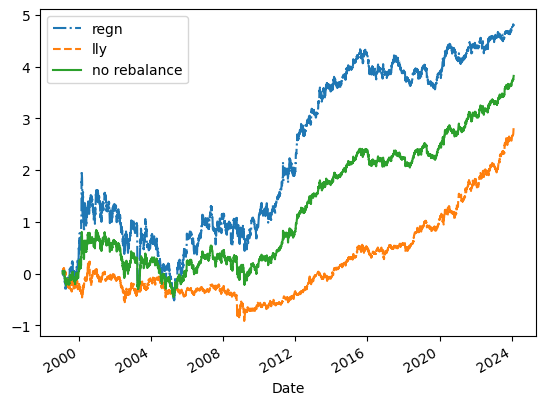

In [9]:
ticker1="regn"
ticker2="lly"
asset1=yf.Ticker(ticker1).history(period="25y")
asset2=yf.Ticker(ticker2).history(period="25y")
asset1=asset1.Close.loc['1998/5/26':]
asset2=asset2.Close.loc['1998/5/26':]

asset1=asset1/asset1.iloc[0]#株価の指数化
lnasset1=np.log(asset1)
dlasset1=lnasset1.diff().dropna()
asset2=asset2/asset2.iloc[0]
lnasset2=np.log(asset2)
dlnasset2=lnasset2.diff().dropna()
lnasset1.plot(label=ticker1,style='-.')
lnasset2.plot(label=ticker2,linestyle='--')
lnport=0.5*lnasset1+0.5*lnasset2
lnport.plot(label='no rebalance')
plt.legend(loc='upper left')

In [10]:
def portfolio_rebalance(tsd1,tsd2):
    port=pd.concat([tsd1,tsd2],axis=1).dropna()
    port.columns=('p1','p2')
    port['a1']=0
    port['a2']=0
    port['v']=1
    n=len(port)
    p1=port['p1'].iloc[0]
    p2=port['p2'].iloc[0]
    v=port['v'].iloc[0]
    a1=float(v/2/p1)
    a2=float(v/2/p2)
    port.iloc[0,2]=a1
    port.iloc[0,3]=a2
    for i in range(1,len(port)):
        p1=port['p1'].iloc[i]#今日のasset1の株価
        p2=port['p2'].iloc[i]#今日のasset2の株価
        p1_0=port['p1'].iloc[i-1]#前日のasset1の株価
        p2_0=port['p2'].iloc[i-1]#前日のasset2の株価
        a1_0=port['a1'].iloc[i-1]#前日のasset1の保有株数
        a2_0=port['a2'].iloc[i-1]#前日のasset2の保有枚数
        v_0=port['v'].iloc[i-1]#前日のリバランスポートフォリオの価値
        #v=a1_0*(p1-p1_0)+a2_0*(p2-p2_0)+v_0#今日のリバランスポートフォリオの価値
        v=a1_0*p1+a2_0*p2#今日のリバランスポートフォリオの価値
        port.iloc[i,4]=v#リバランスポートフォリオの価値のアップデート
        a1=float(v/2/p1)#調整後のasset1の株数
        a2=float(v/2/p2)#調整後のasset2の株数
        port.iloc[i,2]=a1#asset1の株数のアップデート
        port.iloc[i,3]=a2#asset2の株数のアップデート
    port['v2']=0.5*port.p1+0.5*port.p2#リバランスの無いポートフォリオの価値
    return port

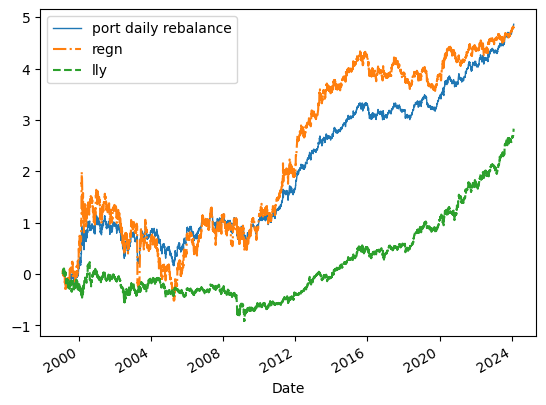

In [11]:
port=portfolio_rebalance(asset1,asset2)

lnport=np.log(port)
lnport.v.plot(label="port daily rebalance",linewidth=1.0)
lnasset1.plot(label=ticker1,style='-.')
lnasset2.plot(label=ticker2,linestyle='--')
plt.legend(loc="upper left")

リバランスの投資効率についてイメージがつかめたと思います。

さて、これで破綻を避けられますか？2銘柄の株を選んだとして、2つの会社が倒産してしまう確率はゼロではありません。株価指数に投資することでそのリスクを回避できます。初心者に株価指数への投資を進める理由はここにあります。

もうひとつ、ドルコスト平均法(積み立て投資)で破綻を避けることはできるでしょうか？破綻はさけられます。その投資効率は「買い持ち」戦略に近いものがあります。しかし、長い間、投資対象資産が下げ続けたらどうなるでしょうか？大きなこころのプレッシャーになると思いませんか？バブル崩壊後の日経平均、1990年代の金市場を考えてみてください。10年以上も続けて下げたならあなたはその資産に継続して投資できますか？それができるのであればドルコスト平均法は戦略の1つになります。

# 本記事そして本記事以外の分析の結果


- 株を購入したら利益が出るまで売らない
- 損切はしない
- 利益が出たらいつでも売っていいが、長く持った方が利益率は上がる

初心者は

- 分散投資された株価指数への投資を基本とするべきです